In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
#Loading fertility dataset
df_fertility = pd.read_csv('./fertility_rate.csv')
df_fertility.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [66]:
#Loading schooling dataset
df_schooling = pd.read_csv('mean-years-of-schooling-long-run.csv', sep=';')
df_schooling.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [67]:
#Renaming "Entity" column to "Country" in the schooling dataset
df_schooling = df_schooling.rename(columns={'Entity': 'Country'})
df_schooling.sort_values('Year')

,Country,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
3482,Jamaica,JAM,1870,0.53
2610,Ghana,GHA,1870,0.01
7519,Venezuela,VEN,1870,0.01
5551,Philippines,PHL,1870,0.02
...,...,...,...,...
7570,Venezuela,VEN,2017,10.30
5706,Portugal,PRT,2017,9.20
1909,Denmark,DNK,2017,12.60
5920,Saint Kitts and Nevis,KNA,2017,8.40


In [68]:
#Transforming the years columns to a single "Year" column containing all years in the fertility dataset
df_fertility = pd.melt(df_fertility,
                       id_vars=["Country",],
                       var_name="Year", value_name="fertility")
df_fertility.head()

,Country,Year,fertility
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49
3,Algeria,1960,7.52
4,Angola,1960,6.71


In [69]:
df_fertility.isna().sum()

Country      0
Year         0
fertility    0
dtype: int64

In [70]:
df_fertility.shape

(11407, 3)

In [71]:
df_fertility.dtypes

Country       object
Year          object
fertility    float64
dtype: object

In [72]:
df_fertility.nunique()

Country      186
Year          61
fertility    751
dtype: int64

In [73]:
#Sorting values by year in the fertility dataset
df_fertility = df_fertility.sort_values(["Country"])
df_fertility.sort_values("Year")

,Country,Year,fertility
0,_World,1960,4.98
107,Malta,1960,3.62
61,France,1960,2.85
142,Samoa,1960,7.65
31,Cambodia,1960,6.97
...,...,...,...
11223,Algeria,2020,2.94
11395,Ukraine,2020,1.22
11325,Maldives,2020,1.82
11322,Madagascar,2020,3.98


In [74]:
#Transforming the "Year" column values into integers and removing everything below the year 1960
df_fertility = df_fertility.astype({'Year':'int'})
df_fertility.drop(df_fertility[df_fertility['Year']<=1959].index, inplace = True)
df_fertility

,Country,Year,fertility
3928,Afghanistan,1981,7.45
8790,Afghanistan,2007,6.56
4863,Afghanistan,1986,7.46
5424,Afghanistan,1989,7.46
6546,Afghanistan,1995,7.61
...,...,...,...
4675,_World,1985,3.54
4862,_World,1986,3.50
8602,_World,2006,2.58
8976,_World,2008,2.55


In [75]:
df_fertility.dtypes

Country       object
Year           int64
fertility    float64
dtype: object

In [77]:
#Removing every "_World" value in the "Country" column since we won't be using them
df_fertility.drop(df_fertility[df_fertility['Country'] == '_World'].index, inplace = True)
df_fertility

,Country,Year,fertility
3928,Afghanistan,1981,7.45
8790,Afghanistan,2007,6.56
4863,Afghanistan,1986,7.46
5424,Afghanistan,1989,7.46
6546,Afghanistan,1995,7.61
...,...,...,...
7666,Zimbabwe,2000,3.75
10845,Zimbabwe,2017,3.71
8040,Zimbabwe,2002,3.72
11032,Zimbabwe,2018,3.62


In [78]:
df_schooling.shape

(7763, 4)

In [80]:
df_schooling.isna().sum()

Country                   0
Code                      0
Year                      0
avg_years_of_schooling    0
dtype: int64

In [81]:
df_schooling.dtypes

Country                    object
Code                       object
Year                        int64
avg_years_of_schooling    float64
dtype: object

In [82]:
df_schooling.nunique()

Country                   193
Code                      193
Year                       52
avg_years_of_schooling    883
dtype: int64

In [84]:
df_schooling = df_schooling.sort_values('Year')
df_schooling

,Country,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
6401,South Korea,KOR,1870,0.01
4554,Mexico,MEX,1870,0.28
7332,United Kingdom,GBR,1870,0.80
1304,Chile,CHL,1870,0.32
...,...,...,...,...
933,Brazil,BRA,2017,7.80
6736,Switzerland,CHE,2017,13.40
969,Brunei,BRN,2017,9.10
4099,Liechtenstein,LIE,2017,12.50


In [85]:
#Merging both datasets into one, each row and column with their respective matching values
df = df_fertility.merge(df_schooling, how='inner', on=('Country', 'Year'))
df

,Country,Year,fertility,Code,avg_years_of_schooling
0,Afghanistan,2007,6.56,AFG,2.9
1,Afghanistan,1995,7.61,AFG,1.9
2,Afghanistan,2008,6.37,AFG,3.0
3,Afghanistan,2017,4.63,AFG,3.8
4,Afghanistan,1994,7.57,AFG,1.8
...,...,...,...,...,...
5121,Zimbabwe,2010,4.03,ZWE,7.3
5122,Zimbabwe,2000,3.75,ZWE,6.5
5123,Zimbabwe,2017,3.71,ZWE,8.2
5124,Zimbabwe,2002,3.72,ZWE,6.9


In [86]:
#Checking for dataset shape
df.shape

(5126, 5)

In [87]:
df.nunique()

Country                   166
Year                       34
fertility                 691
Code                      166
avg_years_of_schooling    701
dtype: int64

In [90]:
df.dtypes

Country                    object
Year                        int64
fertility                 float64
Code                       object
avg_years_of_schooling    float64
dtype: object

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5126 non-null   object 
 1   Year                    5126 non-null   int64  
 2   fertility               5126 non-null   float64
 3   Code                    5126 non-null   object 
 4   avg_years_of_schooling  5126 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 200.4+ KB


In [93]:
df.describe()

,Year,fertility,avg_years_of_schooling
count,5126.000000,5126.000000,5126.000000
mean,1999.147093,3.441104,6.824354
std,14.048037,1.818914,3.368290
min,1960.000000,1.050000,0.000000
25%,1993.000000,1.880000,4.000000
50%,2002.000000,2.860000,6.900000
75%,2010.000000,4.880000,9.600000
max,2017.000000,8.860000,14.100000


In [94]:
#Checking for NaN values
df.isna().sum()

Country                   0
Year                      0
fertility                 0
Code                      0
avg_years_of_schooling    0
dtype: int64

In [95]:
#Checking for duplicates
df.duplicated().sum()

0

In [96]:
#Sorting dataset values by year
df.sort_values('Year')

,Country,Year,fertility,Code,avg_years_of_schooling
1741,Germany,1960,2.37,DEU,7.53
4543,Thailand,1960,6.15,THA,2.07
2464,Kazakhstan,1960,4.56,KAZ,3.07
5009,Vietnam,1960,6.35,VNM,2.01
2487,Kenya,1960,7.95,KEN,1.21
...,...,...,...,...,...
1184,Cuba,2017,1.64,CUB,11.80
3786,Portugal,2017,1.38,PRT,9.20
1212,Cyprus,2017,1.34,CYP,12.10
3716,Philippines,2017,2.64,PHL,9.30


In [97]:
#Grouping by country
df.groupby('Country').count()

,Year,fertility,Code,avg_years_of_schooling
Country,,,,
Afghanistan,34,34,34,34
Albania,34,34,34,34
Algeria,34,34,34,34
Angola,19,19,19,19
Antigua and Barbuda,18,18,18,18
...,...,...,...,...
Venezuela,34,34,34,34
Vietnam,34,34,34,34
Yemen,34,34,34,34


In [98]:
df = df.sort_values(['Country', 'Year'])
df

,Country,Year,fertility,Code,avg_years_of_schooling
28,Afghanistan,1960,7.45,AFG,0.22
15,Afghanistan,1965,7.45,AFG,0.29
26,Afghanistan,1970,7.45,AFG,0.35
10,Afghanistan,1975,7.45,AFG,0.62
32,Afghanistan,1980,7.45,AFG,0.78
...,...,...,...,...,...
5113,Zimbabwe,2013,4.03,ZWE,8.00
5115,Zimbabwe,2014,3.97,ZWE,8.20
5117,Zimbabwe,2015,3.90,ZWE,8.20
5119,Zimbabwe,2016,3.80,ZWE,8.20


In [99]:
df = df[['Year', 'Country', 'Code', 'fertility', 'avg_years_of_schooling']]
df

,Year,Country,Code,fertility,avg_years_of_schooling
28,1960,Afghanistan,AFG,7.45,0.22
15,1965,Afghanistan,AFG,7.45,0.29
26,1970,Afghanistan,AFG,7.45,0.35
10,1975,Afghanistan,AFG,7.45,0.62
32,1980,Afghanistan,AFG,7.45,0.78
...,...,...,...,...,...
5113,2013,Zimbabwe,ZWE,4.03,8.00
5115,2014,Zimbabwe,ZWE,3.97,8.20
5117,2015,Zimbabwe,ZWE,3.90,8.20
5119,2016,Zimbabwe,ZWE,3.80,8.20


In [114]:
df['Country'].nunique()

166

In [154]:
df.dtypes

Year                         int64
Country                     object
Code                        object
fertility                 category
avg_years_of_schooling     float64
dtype: object

In [156]:
df = df.astype({'fertility':'float'})
df.dtypes

Year                        int64
Country                    object
Code                       object
fertility                 float64
avg_years_of_schooling    float64
dtype: object

In [168]:
df.corr

<bound method DataFrame.corr of       Year      Country Code  fertility  avg_years_of_schooling
28    1960  Afghanistan  AFG       7.45                    0.22
15    1965  Afghanistan  AFG       7.45                    0.29
26    1970  Afghanistan  AFG       7.45                    0.35
10    1975  Afghanistan  AFG       7.45                    0.62
32    1980  Afghanistan  AFG       7.45                    0.78
...    ...          ...  ...        ...                     ...
5113  2013     Zimbabwe  ZWE       4.03                    8.00
5115  2014     Zimbabwe  ZWE       3.97                    8.20
5117  2015     Zimbabwe  ZWE       3.90                    8.20
5119  2016     Zimbabwe  ZWE       3.80                    8.20
5123  2017     Zimbabwe  ZWE       3.71                    8.20

[5126 rows x 5 columns]>

In [171]:
df_yearindex = df.set_index('Year')
df_yearindex

,Country,Code,fertility,avg_years_of_schooling
Year,,,,
1960,Afghanistan,AFG,7.45,0.22
1965,Afghanistan,AFG,7.45,0.29
1970,Afghanistan,AFG,7.45,0.35
1975,Afghanistan,AFG,7.45,0.62
1980,Afghanistan,AFG,7.45,0.78
...,...,...,...,...
2013,Zimbabwe,ZWE,4.03,8.00
2014,Zimbabwe,ZWE,3.97,8.20
2015,Zimbabwe,ZWE,3.90,8.20


In [183]:
#Testing .corr() on float values
df_yearindex = df_yearindex[['fertility', 'avg_years_of_schooling']]
df_yearindex.corr()

,fertility,avg_years_of_schooling
fertility,1.000000,-0.816442
avg_years_of_schooling,-0.816442,1.000000


### Getting previous EDA work

In [194]:
df_1960 = df[df['Year']==1960]
df_1970 = df[df['Year']==1970]
df_1980 = df[df['Year']==1980]
df_1990 = df[df['Year']==1990]
df_2000 = df[df['Year']==2000]
df_2010 = df[df['Year']==2010]

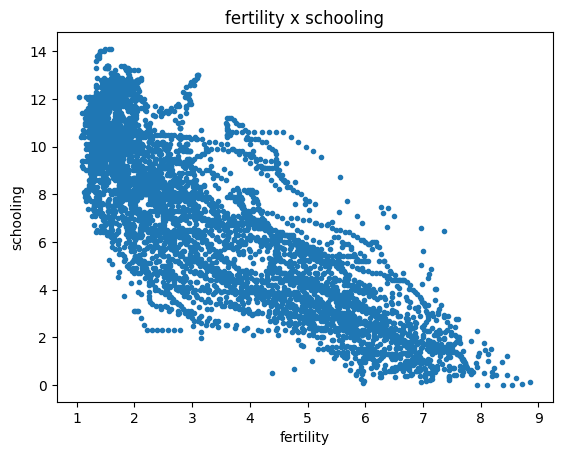

In [144]:
#Using matplotlib to plot an example graph
plt.scatter(df['fertility'], df['avg_years_of_schooling'], marker='.')
plt.title("fertility x schooling")
plt.xlabel("fertility")
plt.ylabel("schooling")
plt.show()

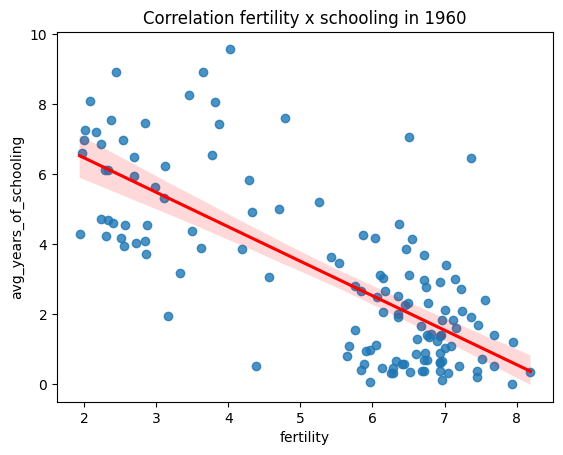

In [197]:
#Using seaborn to plot an example graph
sns.regplot(data=df_1960, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1960');

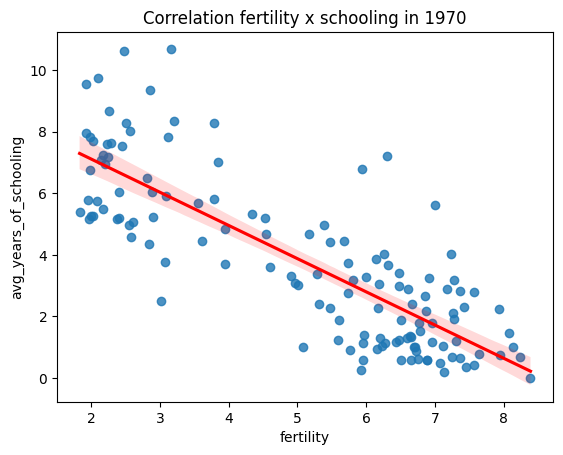

In [198]:
sns.regplot(data=df_1970, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1970');

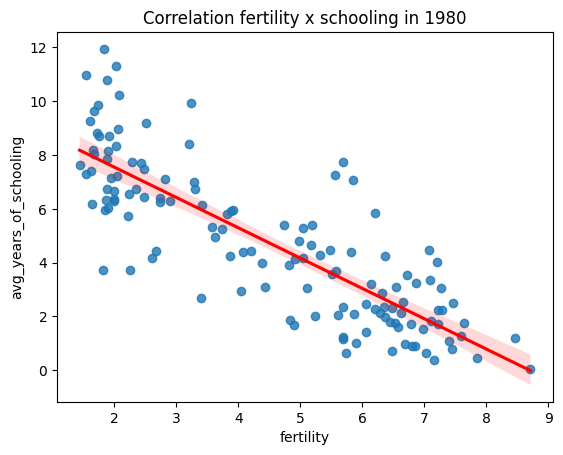

In [199]:
sns.regplot(data=df_1980, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1980');

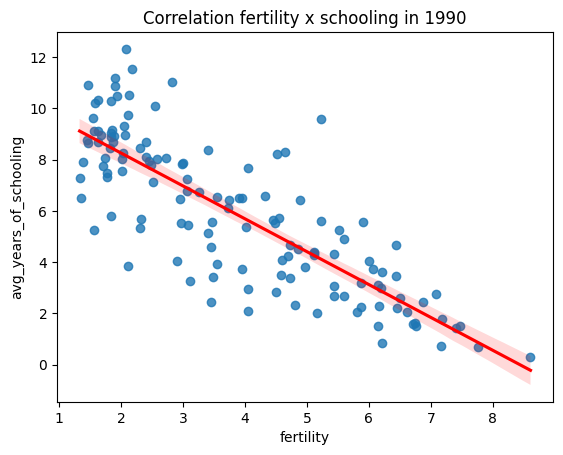

In [200]:
sns.regplot(data=df_1990, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1990');

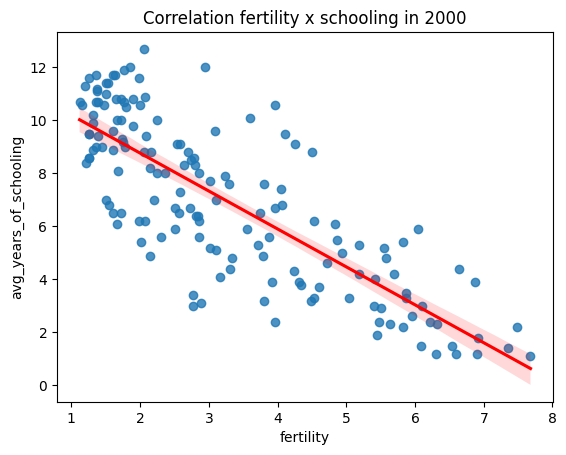

In [201]:
sns.regplot(data=df_2000, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 2000');

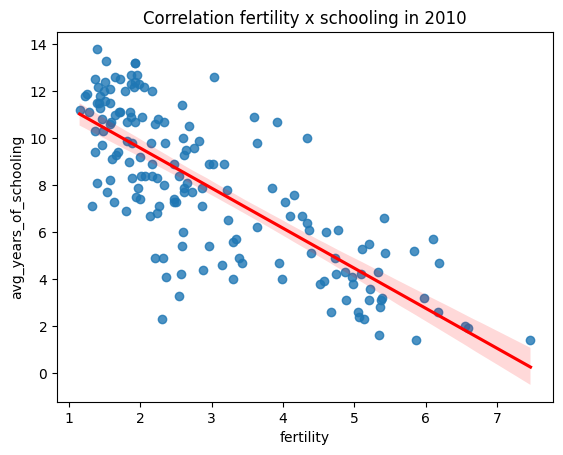

In [202]:
sns.regplot(data=df_2010, x="fertility", y="avg_years_of_schooling", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 2010');

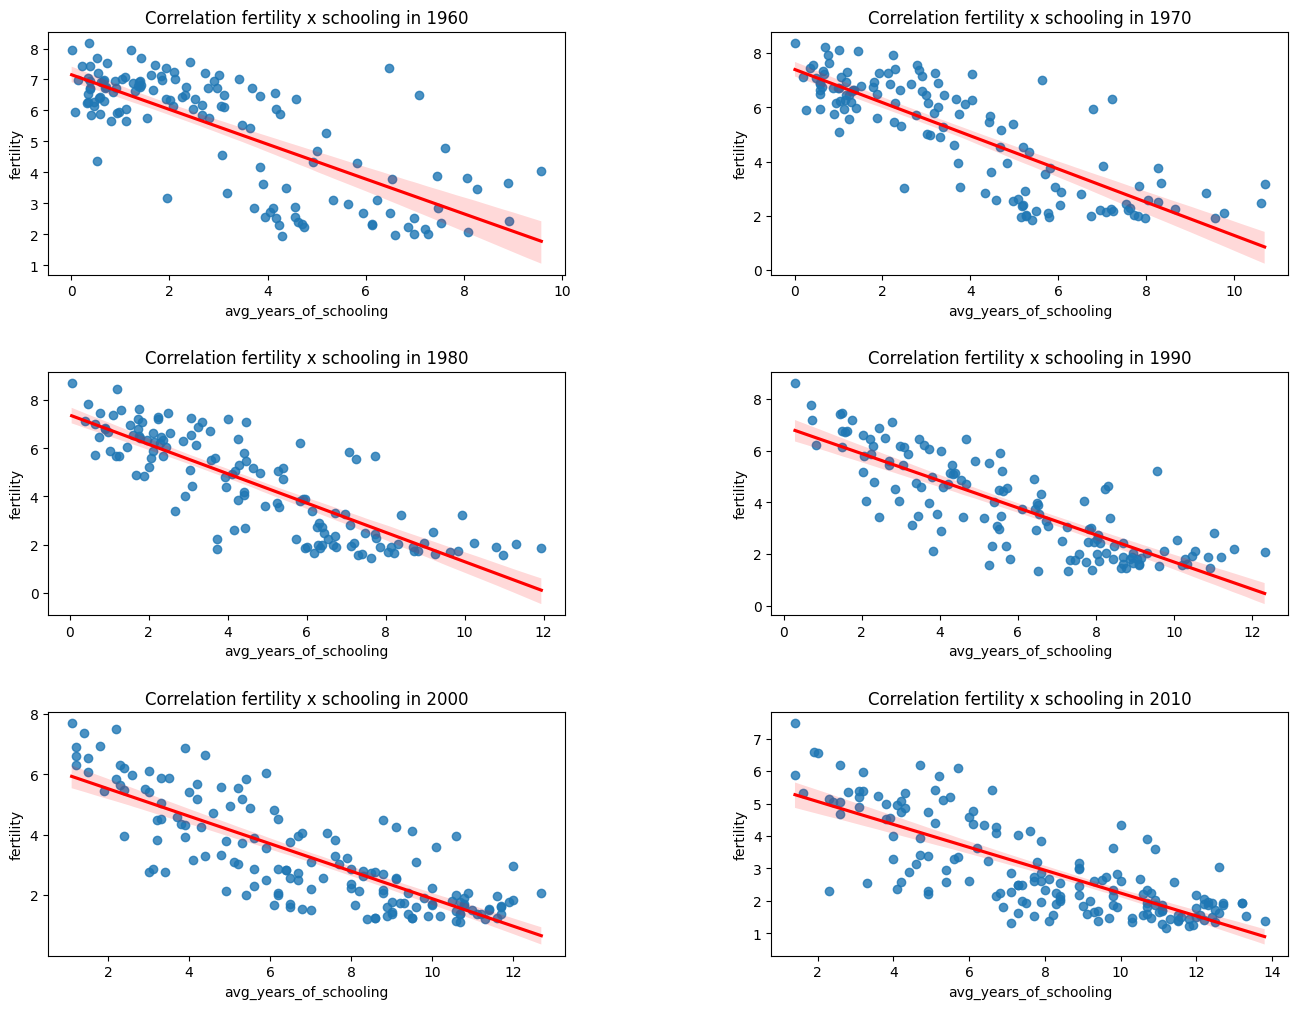

In [247]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.regplot(ax=axes[0, 0], data=df_1960, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1960');

sns.regplot(ax=axes[0, 1], data=df_1970, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1970');


sns.regplot(ax=axes[1, 0], data=df_1980, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1980');


sns.regplot(ax=axes[1, 1], data=df_1990, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 1990');


sns.regplot(ax=axes[2, 0], data=df_2000, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 2000');


sns.regplot(ax=axes[2, 1], data=df_2010, x="avg_years_of_schooling", y="fertility", fit_reg=True,
                                                                line_kws={"color": "red"}).set_title('Correlation fertility x schooling in 2010');

### Percentage Graph

In [ ]:
def bar_percentage(data, z):
    total = len(data[z])
    plt.figure(figsize=(15,5))
    
    #convert column into categorial data type
    data[z] = data[z].astype('category')
    
    ax = sns.barplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percetange = '{:.1f}%'.format(100 * p.get_height()/total)# percentage of each class
        x = p.get_x() + p.get_width()/2-0.05 #width of the plot
        y = p.get_y() + p.get_height() # height of the plot
        ax.annotate(percetange, (x, y), size=12)
    plt.show()

In [ ]:
bar_percentage(df, 'fertility')

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))

df_education_improved.sort_values(by='years_improved', ascending=False, inplace=True)

sns.barplot(data=df_education_improved.head(50), x='Year_x', y='avg_years_of_schooling_x', hue='Country', ax=ax)
plt.bar(x=df_education_improved['Country'], y=df_education_improved['years_improved'], width=0.3, height=0.8)
#plt.xticks(rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()


#plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)